In [8]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv("/content/Restaurants.csv")
df.head()

,name,city,state,zipcode,country,cuisines,pickup_enabled,delivery_enabled,weighted_rating_value,aggregated_rating_count
0,Burger King,Manitowoc,WI,54220,US,"American, Burger, Burgers, Family Meals, Fast ...",True,True,2.4,42
1,Petro-Canada,Airdrie,AB,T4A,CA,"Ben & Jerry's, Café/Thé, Coffee/Tea, Convenien...",True,True,4.1,1
2,Boba Bae,Ashwaubenon,WI,54304,US,"American, Asian Food, Bubble Tea, Coffee & Tea...",True,True,4.0,88
3,1001 Nights Shawarma,Kitchener,ON,N2C,CA,"Beau, Bon, Local, Chicken, Dessert, Desserts, ...",True,True,4.6,1077
4,Chirpyhut Fried Chicken (JlgJ),Richmond,BC,V6X 2B8,CA,"Ailes, Allergy Friendly, American, Beau, Bon, ...",True,True,4.6,30


In [14]:
df['length'] = df['city'].str.len()
df.describe()

,weighted_rating_value,aggregated_rating_count,length
count,1500.000000,1500.000000,1500.000000
mean,3.724533,85.500667,8.856000
std,0.989005,277.071136,2.624727
min,1.000000,1.000000,4.000000
25%,2.900000,5.000000,7.000000
50%,4.100000,25.000000,8.000000
75%,4.600000,68.000000,10.000000
max,5.000000,4211.000000,27.000000


In [15]:
df.describe()

,weighted_rating_value,aggregated_rating_count,length
count,1500.000000,1500.000000,1500.000000
mean,3.724533,85.500667,8.856000
std,0.989005,277.071136,2.624727
min,1.000000,1.000000,4.000000
25%,2.900000,5.000000,7.000000
50%,4.100000,25.000000,8.000000
75%,4.600000,68.000000,10.000000
max,5.000000,4211.000000,27.000000


In [16]:
df.describe(include = 'O')

,name,city,state,zipcode,country,cuisines
count,1500,1500,1500,1500,1500,1499
unique,597,508,54,786,2,744
top,Petro-Canada,Edmonton,ON,T4A,US,"Ben & Jerry's, Café/Thé, Coffee/Tea, Convenien..."
freq,208,55,256,21,829,21


# ***Checking the missing data***

In [17]:
df.isna().sum()

name                       0
city                       0
state                      0
zipcode                    0
country                    0
cuisines                   1
pickup_enabled             0
delivery_enabled           0
weighted_rating_value      0
aggregated_rating_count    0
length                     0
dtype: int64

In [18]:
df['cuisines'].fillna('unknown', inplace=True)
df.isna().sum()


name                       0
city                       0
state                      0
zipcode                    0
country                    0
cuisines                   0
pickup_enabled             0
delivery_enabled           0
weighted_rating_value      0
aggregated_rating_count    0
length                     0
dtype: int64

In [19]:
df['city'] = df['city'].str.upper()
df['country'] = df['country'].str.upper()
df['state'] = df['state'].str.upper()

In [20]:
df[df['cuisines'].str.contains('America')]

,name,city,state,zipcode,country,cuisines,pickup_enabled,delivery_enabled,weighted_rating_value,aggregated_rating_count,length
0,Burger King,MANITOWOC,WI,54220,US,"American, Burger, Burgers, Family Meals, Fast ...",True,True,2.4,42,9
2,Boba Bae,ASHWAUBENON,WI,54304,US,"American, Asian Food, Bubble Tea, Coffee & Tea...",True,True,4.0,88,11
4,Chirpyhut Fried Chicken (JlgJ),RICHMOND,BC,V6X 2B8,CA,"Ailes, Allergy Friendly, American, Beau, Bon, ...",True,True,4.6,30,8
7,El Valle Verde,CINCINNATI,OH,45205,US,"Burritos, Dessert, Kids Menu, Latin American, ...",True,True,2.4,5,10
8,Rock Salad,DUBUQUE,IA,52001,US,"American, Bowls, Dessert, Healthy Food, Salads...",True,True,4.3,35,7
...,...,...,...,...,...,...,...,...,...,...,...
1488,Chirpyhut Fried Chicken (JlgJ),RICHMOND,BC,V6X 2B8,CA,"Ailes, Allergy Friendly, American, Beau, Bon, ...",True,True,4.6,30,8
1489,Pizza & Grill,SAN ANTONIO,TX,78208,US,"American, Bistro, Cheesesteak, Chicken, Desser...",True,True,2.1,667,11
1495,Grandma's Soul Food,RICHMOND,VA,23234,US,"American, Burgers, Chicken, Dessert, Dinner, K...",True,True,2.0,5,8
1496,Jimbob's Pizza,EAU CLAIRE,WI,54701,US,"American, Fast Food, Healthy Pizza, Ice Cream ...",False,True,4.1,127,10


# ***Plotting the data***

<Axes: >

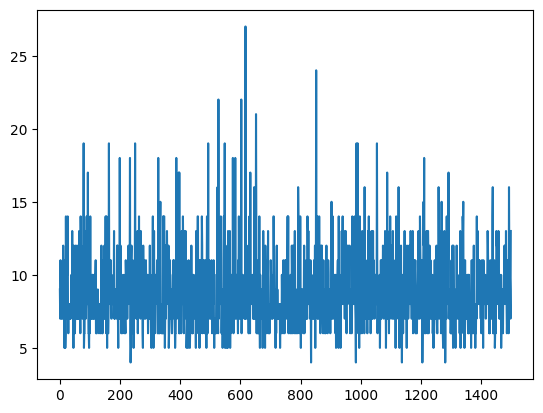

In [31]:
df['length'].plot()


<Axes: >

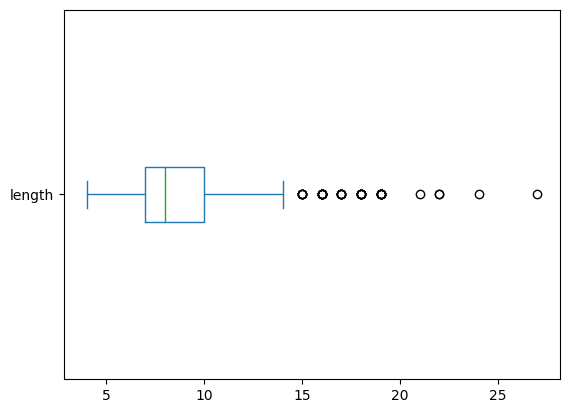

In [33]:
df['length'].plot(kind='box', vert=False)

<Axes: ylabel='Frequency'>

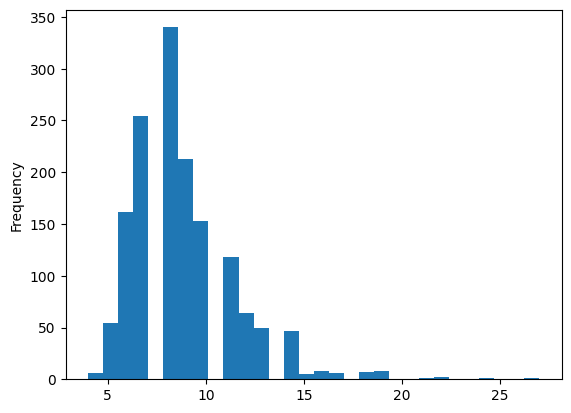

In [22]:
#Histogram

df['length'].plot(kind='hist', bins=30)


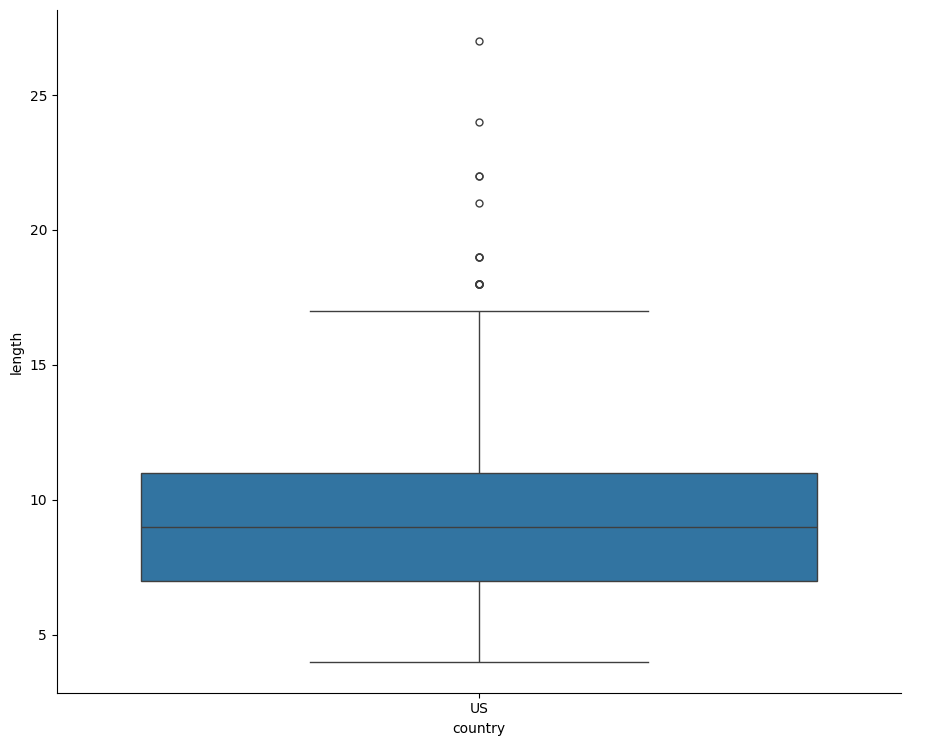

In [30]:
#Bar plot

import seaborn as sns
where = df['country'].isin(['US', 'WI', 'AB', 'BC', 'ON'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(10, 8) ###

# ***Use of Regex***

In [34]:
import regex as re
import nltk

In [40]:
!pip show nltk

Name: nltk
Version: 3.8.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: click, joblib, regex, tqdm
Required-by: textblob


In [37]:
!pip install nltk

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [45]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [46]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
stopwords = set(nltk.corpus.stopwords.words('english'))

In [47]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [49]:
df['tokens'] = df['city'].apply(prepare, pipeline=pipeline)

In [50]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,name,city,state,zipcode,country,cuisines,pickup_enabled,delivery_enabled,weighted_rating_value,aggregated_rating_count,length,tokens,num_tokens
1495,Grandma's Soul Food,RICHMOND,VA,23234,US,"American, Burgers, Chicken, Dessert, Dinner, K...",True,True,2.0,5,8,[richmond],1
1496,Jimbob's Pizza,EAU CLAIRE,WI,54701,US,"American, Fast Food, Healthy Pizza, Ice Cream ...",False,True,4.1,127,10,"[eau, claire]",2
1497,Petro-Canada,LONGUEUIL,QC,J4V,CA,"Convenience, Everyday Essentials, Grocery, Hom...",True,True,4.5,47,9,[longueuil],1
1498,Denny's,KINGMAN,AZ,86401,US,"American, Breakfast And Brunch, Coffee And Tea...",True,True,3.4,22,7,[kingman],1
1499,Bean House,RICHMOND HILL,ON,L4B 3Z1,CA,"Alcohol, Asian, Asian Fusion, Chinese, Dessert...",True,True,4.8,93,13,"[richmond, hill]",2


# ***Word frequency***

In [51]:
from collections import Counter

In [52]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('edmonton', 55), ('montréal', 41), ('richmond', 36), ('vancouver', 33), ('st', 30)]


In [54]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(20)

,freq
token,
edmonton,55
montréal,41
richmond,36
vancouver,33
st,30
waterloo,26
red,24
deer,24
burlington,23


In [55]:
freq_df.describe()

,freq
count,536.000000
mean,3.462687
std,5.448013
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,55.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

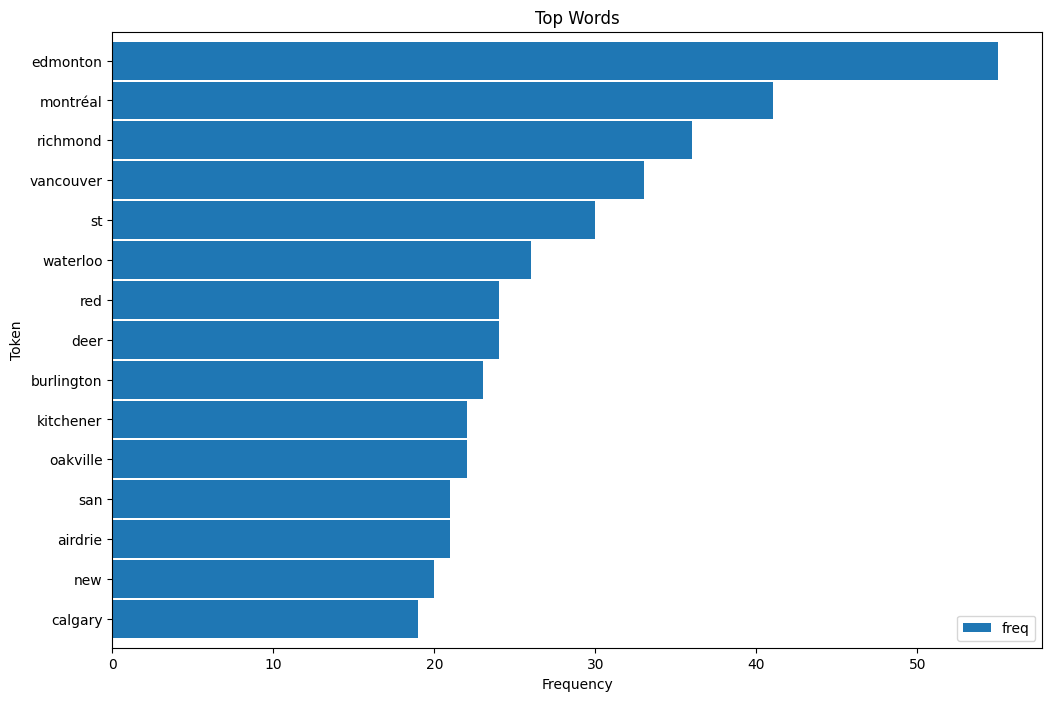

In [56]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# ***Word cloud***

In [57]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

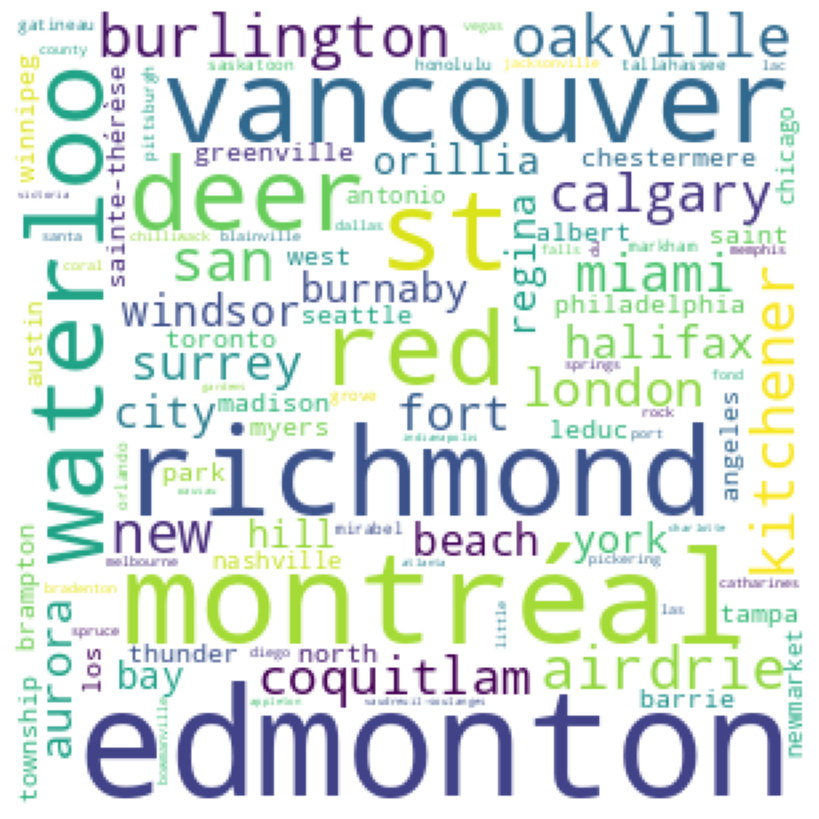

In [59]:
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()